# Ch 7: Linear regression with a single predictor

See https://github.com/avehtari/ROS-Examples/tree/master/ElectionsEconomy

In [13]:
library("rstanarm")
#library("ggplot2")
#library("bayesplot")

In [14]:
#theme_set(bayesplot::theme_default(base_family="sans"))

In [18]:
hibbs <- read.table("data/hibbs.dat", header=TRUE)
hibbs

year,growth,vote,inc_party_candidate,other_candidate
<int>,<dbl>,<dbl>,<chr>,<chr>
1952,2.40,44.60,Stevenson,Eisenhower
1956,2.89,57.76,Eisenhower,Stevenson
1960,0.85,49.91,Nixon,Kennedy
1964,4.21,61.34,Johnson,Goldwater
1968,3.02,49.60,Humphrey,Nixon
1972,3.62,61.79,Nixon,McGovern
1976,1.08,48.95,Ford,Carter
1980,-0.39,44.70,Carter,Reagan
1984,3.86,59.17,Reagan,Mondale


## 1 Linear regression, single predictor 

In [9]:
M1 <- stan_glm(vote ~ growth, data=hibbs)
M1


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.029669 seconds (Warm-up)
Chain 1:                0.022816 seconds (Sampling)
Chain 1:              

stan_glm
 family:       gaussian [identity]
 formula:      vote ~ growth
 observations: 16
 predictors:   2
------
            Median MAD_SD
(Intercept) 46.2    1.7  
growth       3.1    0.7  

Auxiliary parameter(s):
      Median MAD_SD
sigma 3.9    0.8   

------
* For help interpreting the printed output see ?print.stanreg
* For info on the priors used see ?prior_summary.stanreg

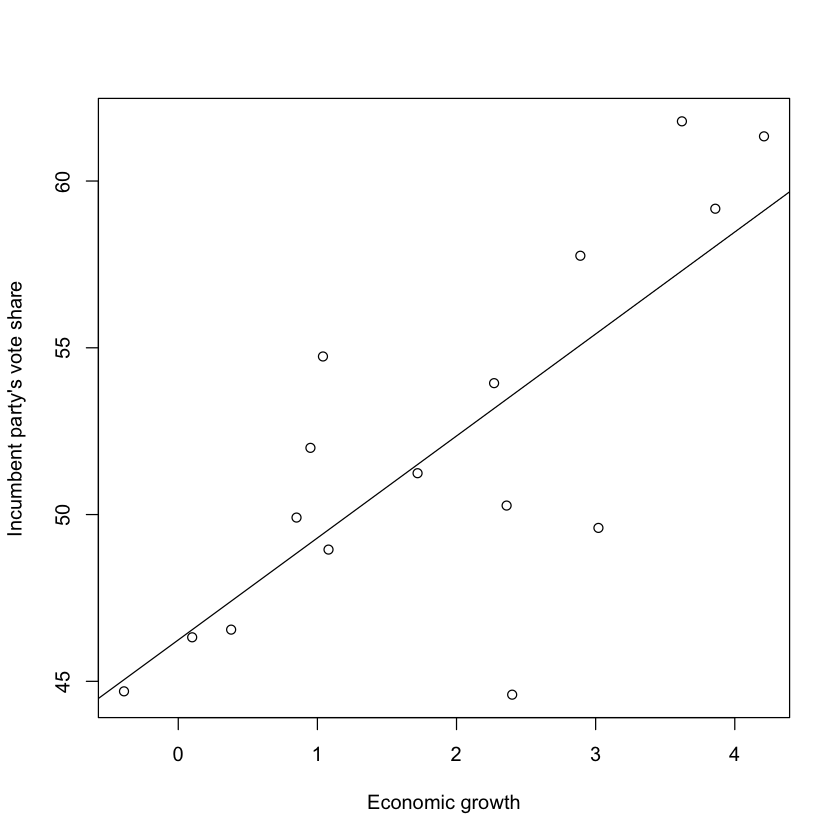

In [17]:
plot(hibbs$growth, hibbs$vote, xlab="Economic growth", ylab="Incumbent party's vote share")
abline(coef(M1))

## 2 Fake data simulation

### 2.1 Create world 

In [20]:
# Create the world
a <- 46.3
b <- 3.0
sigma <- 3.9
x <- hibbs$growth
n <- length(x)

### 2.2 Create fake data 

In [21]:
# Create fake data
y <- a + b*x + rnorm(n, 0, sigma)
fake <- data.frame(x, y)

### 2.3 Fit model and compare to assumed values 

In [22]:
# Fit the model and compare fitted to assumed values
fit <- stan_glm(y ~ x, data=fake)
fit


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.037836 seconds (Warm-up)
Chain 1:                0.027753 seconds (Sampling)
Chain 1:                0

stan_glm
 family:       gaussian [identity]
 formula:      y ~ x
 observations: 16
 predictors:   2
------
            Median MAD_SD
(Intercept) 42.6    1.6  
x            4.2    0.7  

Auxiliary parameter(s):
      Median MAD_SD
sigma 3.8    0.7   

------
* For help interpreting the printed output see ?print.stanreg
* For info on the priors used see ?prior_summary.stanreg

In [23]:
b_hat <- coef(fit)["x"]
b_se <- se(fit)["x"]

In [30]:
b_hat

x 
4.179671

In [28]:
b_se

x 
0.6914877

In [34]:
cover_68 <- abs(b - b_hat) < b_se
cover_95 <- abs(b - b_hat) < 2 * b_se
cat(paste("68% coverage: ", cover_68, "\n"))
cat(paste("95% coverage: ", cover_95, "\n"))

68% coverage:  FALSE 
95% coverage:  TRUE 


### 2.4 Embed the simulation in a loop 

In [35]:
n_fake <- 1000
cover_68 <- rep(NA, n_fake)
cover_95 <- rep(NA, n_fake)
for (s in 1:n_fake) {
    y <- a + b*x + rnorm(n, 0, sigma)
    fake <- data.frame(x, y)
    fit <- stan_glm(y ~ x, data=fake, refresh=0) # suppress console output
    b_hat <- coef(fit)["x"]
    b_se <- se(fit)["x"]
    cover_68[s] <- abs(b - b_hat) < b_se
    cover_95[s] <- abs(b - b_hat) < 2 * b_se
}

In [36]:
cat(paste("68% coverage: ", mean(cover_68), "\n"))
cat(paste("95% coverage: ", mean(cover_95), "\n"))

68% coverage:  0.662 
95% coverage:  0.928 
